In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl

In [195]:
trips = pd.read_csv("data/trip.csv")
weather = pd.read_csv("data/weather.csv")
stations = pd.read_csv("data/station.csv")

In [196]:
trips.start_date = pd.to_datetime(trips.start_date)
trips.end_date = pd.to_datetime(trips.end_date)
trips.duration = trips.duration / 60
trips["week_day"] = trips.start_date.dt.weekday_name


In [210]:
trips["date"] = pd.to_datetime(trips.start_date.dt.date)

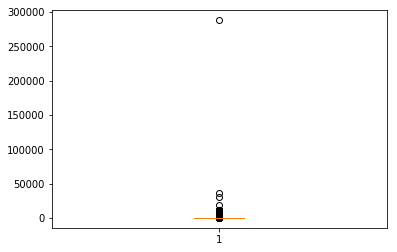

In [211]:
# Realizo un box plot para ver en general como estan distribuidas las duraciones de cada viaje.
pl.boxplot(trips.duration)
pl.show()

In [212]:
trips.loc[trips.duration > trips.duration.quantile(0.995), "duration"].mean() / 60

16.487833001658377

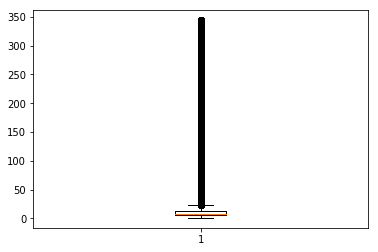

In [213]:
# # Queda claro que hay unos pocos numoeros que se van de escala, por lo que los elimino 
trips_without_outliers = trips[trips.duration < trips.duration.quantile(0.995)]

pl.boxplot(trips_without_outliers.duration)
pl.show()

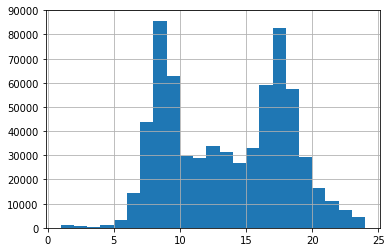

In [8]:
# Distribucion horaria del comienzo de los viajes
trips_without_outliers.start_date.apply(lambda date: date.hour).hist(bins=range(1,25))
pl.show()

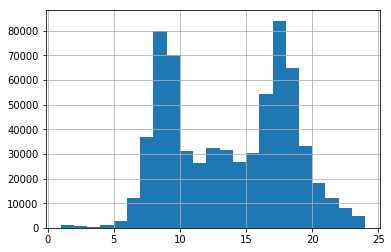

In [9]:
# Distribucion horaria de la finalizacion de los viajes
trips_without_outliers.end_date.apply(lambda date: date.hour).hist(bins=range(1,25))
pl.show()

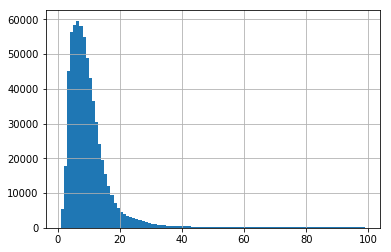

In [10]:
# Distribucion de la duracion de los viajes en cantidad de minutos
trips_without_outliers.duration.hist(bins=range(1,100))
pl.show()


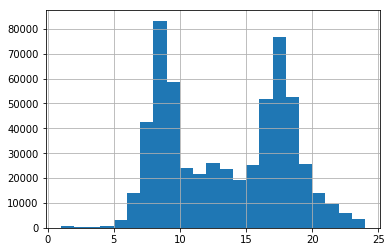

In [11]:
# Distribucion horaria del comienzo de los viajes los dias de semana
trips_without_outliers.start_date[trips_without_outliers.start_date.dt.dayofweek < 5]\
     .apply(lambda date: date.hour)\
     .hist(bins=range(1,25))

pl.show()

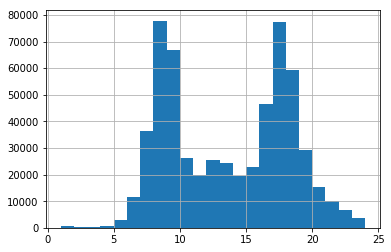

In [12]:
# Distribucion horaria de finalizacion de los viajes de los viajes los dias de semana
trips_without_outliers.end_date[trips_without_outliers.end_date.dt.dayofweek < 5]\
     .apply(lambda date: date.hour)\
     .hist(bins=range(1,25))

pl.show()

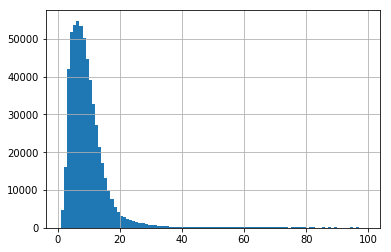

In [13]:
# Distribucion de la duracion de los viajes en cantidad de minutos comenzandos en dias de semana
trips_without_outliers.loc[trips.start_date.dt.dayofweek < 5,:]\
     .duration\
     .hist(bins=range(1,100))

pl.show()

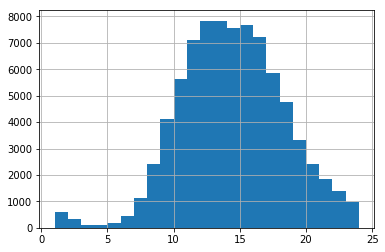

In [14]:
# Distribucion horaria del comienzo de los viajes los dias de fin de semana
trips_without_outliers.start_date[trips_without_outliers.start_date.dt.dayofweek > 4]\
     .apply(lambda date: date.hour)\
     .hist(bins=range(1,25))
        
pl.show()


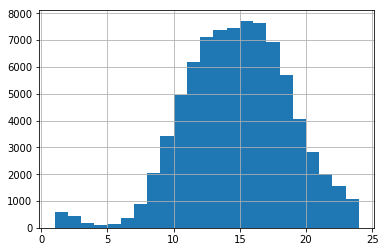

In [15]:
# Distribucion horaria de finalizacion de los viajes los dias de fin de semana
trips_without_outliers.end_date[trips_without_outliers.end_date.dt.dayofweek > 4]\
     .apply(lambda date: date.hour)\
     .hist(bins=range(1,25))
        
pl.show()        

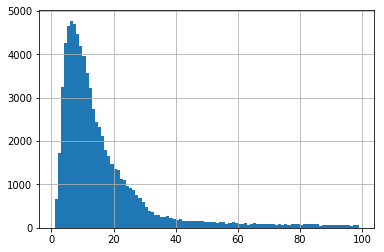

In [16]:
# Distribucion de la duracion de los viajes en cantidad de minutos comenzandos en dias de fin de semana
trips_without_outliers.loc[trips.start_date.dt.dayofweek > 4,:]\
     .duration\
     .hist(bins=range(1,100))
        
pl.show()

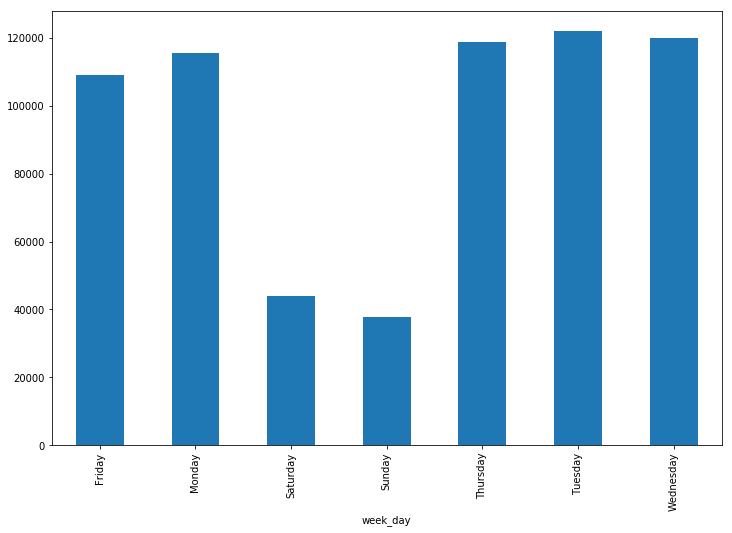

In [17]:
trips_without_outliers.groupby("week_day").size().plot(kind='bar',figsize=(12,8))

pl.show()

In [249]:
weather = pd.read_csv("data/weather.csv")

In [250]:
def toCelcius(f):
    return (f - 32) * 5.0/9.0

weather["max_temperature_C"] = toCelcius(weather.max_temperature_f)
weather["mean_temperature_C"] = toCelcius(weather.mean_temperature_f)
weather["min_temperature_C"] = toCelcius(weather.min_temperature_f)
weather["max_dew_point_C"] = toCelcius(weather.max_dew_point_f)
weather["mean_dew_point_C"] = toCelcius(weather.mean_dew_point_f)
weather["min_dew_point_C"] = toCelcius(weather.min_dew_point_f)
weather["date"] = pd.to_datetime(weather.date)

weather = weather.drop("max_temperature_f", 1)\
                 .drop("mean_temperature_f", 1)\
                 .drop("min_temperature_f", 1)\
                 .drop("max_dew_point_f", 1)\
                 .drop("mean_dew_point_f", 1)\
                 .drop("min_dew_point_f", 1)



In [251]:
weather.loc[weather.events == 'Rain',"events"] = 'rain'
# weather.loc[weather.events == 'Rain-Thunderstorm', "events" ] = 'rain'
weather.loc[weather.events.isnull(), "events"] = 'normal'

In [261]:
weather.zip_code.unique()

array([94107, 94063, 94301, 94041, 95113])

In [277]:
weather_94107 = weather.loc[95113 == weather.zip_code]

In [278]:
trips_with_weather = pd.merge(trips_without_outliers, weather_94107, on="date", how="inner")

In [279]:
x = trips_with_weather.loc[trips_with_weather.date.dt.dayofweek < 5 ,].groupby("events").size()
x

events
Fog           9632
Fog-Rain       797
normal      525580
rain         48813
dtype: int64

In [280]:
y = weather_94107.loc[weather_94107.date.dt.dayofweek < 5, :].groupby("events").size()
y

events
Fog           9
Fog-Rain      2
normal      457
rain         55
dtype: int64

In [281]:
x / y

events
Fog         1070.222222
Fog-Rain     398.500000
normal      1150.065646
rain         887.509091
dtype: float64